# DoITForAlex

# Szkolenie z analizy danych z wykorzystaniem języka programowania Python - zadania praktyczne

Prowadzący: Dorota Mierzwa, Martyna Urbanek-Trzeciak

## Część praktyczna I

Wykorzystamy dane z Google Trends dotyczące wyszukiwana wybranych fraz: `crossfit`, `python` oraz `tofu` (możesz zmienić `tofu` na inne słowo, dla łatwości korzystania z notebooka - `crossfit` i `python` powinny zostać :).

Dane pobierz [stąd](https://trends.google.com/trends/explore?date=all&q=crossfit,python,tofu).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#### 1. Wczytaj dane z pliku multiTimeline.csv. Spróbuj użyć argumentu "header", słowa wyszukiwane w Google Trends znalazły się w nazwach kolumn

In [3]:
# wczytaj dane 
df = pd.read_csv('multiTimeline.csv', header=1)

#### 2. Wyświetl 5 pierwszych wierszy danych

In [4]:
df.head()

,Month,crossfit: (Worldwide),python: (Worldwide),tofu: (Worldwide)
0,2004-01,<1,43,6
1,2004-02,<1,41,5
2,2004-03,<1,40,5
3,2004-04,<1,38,5
4,2004-05,<1,38,5


#### 3. Wyświetl 5 ostatnich wierszy danych

In [5]:
df.tail()

,Month,crossfit: (Worldwide),python: (Worldwide),tofu: (Worldwide)
187,2019-08,25,88,9
188,2019-09,16,98,9
189,2019-10,20,100,9
190,2019-11,17,97,10
191,2019-12,14,87,9


#### 4. Wyświetl wartości dla wiersza o numerycznym indeksie 100

In [6]:
df.iloc[100]

Month                    2012-05
crossfit: (Worldwide)         20
python: (Worldwide)           31
tofu: (Worldwide)              6
Name: 100, dtype: object

#### 5. Zmień nazwy kolumn usuwając ": (Worldwide)". Zamień również kolumnę "Month" na "Date".

In [7]:
df.rename(columns={'crossfit: (Worldwide)': 'crossfit',
                  'python: (Worldwide)': 'python',
                  'tofu: (Worldwide)': 'tofu',
                  'Month': 'Date'}, 
          inplace=True)

#### 6. Wyświetl wiersz dla daty 2019-01

In [8]:
df[df['Date'] == '2019-01']

,Date,crossfit,python,tofu
180,2019-01,19,80,10


#### 7. Wyświetl wiersz dla dat większych od września 2019

In [9]:
df[df['Date'] > '2019-09']

,Date,crossfit,python,tofu
189,2019-10,20,100,9
190,2019-11,17,97,10
191,2019-12,14,87,9


#### 8. Wyświetl wiersze dla dat większych od stycznia 2018 ale mniejszych niż maj 2018

In [10]:
df[(df['Date'] > '2018-01') & (df['Date'] < '2018-05')]

,Date,crossfit,python,tofu
169,2018-02,24,77,9
170,2018-03,26,78,9
171,2018-04,18,78,8


#### 9. Wyświetl wiersze, gdy wartość w kolumnie python jest większa niż 90 LUB mniejsza niż 20

In [11]:
df[(df['python'] < 30) | (df['python'] > 90)]

,Date,crossfit,python,tofu
48,2008-01,2,29,5
49,2008-02,2,29,5
50,2008-03,2,29,5
55,2008-08,3,29,5
60,2009-01,4,29,5
65,2009-06,4,29,5
71,2009-12,5,29,4
72,2010-01,6,29,6
78,2010-07,8,28,5
79,2010-08,7,29,5


#### 10. Nadpisz wartość w kolumnie "python", dla 2019-12 by równała się 100. Wyświetl ostatnie wiersze DataFrame, by sprawdzić, czy wartość jest taka, jakiej się spodziewasz. 

In [12]:
df_copy = df.copy()

In [13]:
df_copy.loc[df_copy['Date']=='2019-12', 'python'] = 100

In [14]:
df_copy.tail()

,Date,crossfit,python,tofu
187,2019-08,25,88,9
188,2019-09,16,98,9
189,2019-10,20,100,9
190,2019-11,17,97,10
191,2019-12,14,100,9


#### 11. Sprawdź jakie typy mają kolumny

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Date        192 non-null object
crossfit    192 non-null object
python      192 non-null int64
tofu        192 non-null int64
dtypes: int64(2), object(2)
memory usage: 6.1+ KB


#### 12. Zmień typy kolumn "Month" na datetime oraz "crossfit" na int. 

Zauważ, że w kolumnie "crossfit" oprócz cyfr są także znaki specjalne, których trzeba się pozbyć. Spróbuj użyć funkcji str.replace według dokumentacji pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html

In [16]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [17]:
# zawsze dobrze sprawdzić, czy "<1" to jedyna problematyczna wartość. 
# value_counts pokaże wszystkie wartości oraz to, ile razy wystąpiły w danej kolumnie.
df['crossfit'].value_counts()

<1    34
1     14
20    11
21    10
19     9
22     8
25     8
16     7
3      7
28     7
5      7
4      6
18     6
24     5
7      5
6      5
2      5
23     5
29     4
30     3
26     3
12     3
17     3
9      2
8      2
27     2
13     2
11     2
10     2
14     1
34     1
32     1
33     1
31     1
Name: crossfit, dtype: int64

In [18]:
df['crossfit'] = df['crossfit'].str.replace('<', '') # zamieniamy "<" na brak znaku

In [19]:
df['crossfit'].value_counts()

1     48
20    11
21    10
19     9
22     8
25     8
16     7
3      7
28     7
5      7
4      6
18     6
24     5
7      5
6      5
2      5
23     5
29     4
12     3
26     3
17     3
30     3
9      2
8      2
27     2
13     2
11     2
10     2
34     1
14     1
31     1
32     1
33     1
Name: crossfit, dtype: int64

In [20]:
df['crossfit'] = df['crossfit'].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
Date        192 non-null datetime64[ns]
crossfit    192 non-null int64
python      192 non-null int64
tofu        192 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.1 KB


#### 13. Ile razy crossfit prześcignął pythona w wyszukiwaniach w Google?

In [22]:
df[df['crossfit'] > df['python']]

,Date,crossfit,python,tofu
114,2013-07-01,34,33,6


In [23]:
len(df[df['crossfit'] > df['python']])

1

#### 14. Jaka jest maksymalna wartość dla każdego z wyszukiwanych słów?

In [24]:
df[['crossfit', 'python', 'tofu']].max()

crossfit     34
python      100
tofu         10
dtype: int64

#### 15. Jaka jest minimalna wartość dla każdego z wyszukiwanych słów?

In [25]:
df[['crossfit', 'python', 'tofu']].min()

crossfit     1
python      28
tofu         4
dtype: int64

#### 16. Stwórz nową kolumnę, która będzie zawierać tylko rok

W tym celu możesz wykorzystać https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

In [26]:
df['Year'] = df['Date'].dt.year

In [27]:
df.head()

,Date,crossfit,python,tofu,Year
0,2004-01-01,1,43,6,2004
1,2004-02-01,1,41,5,2004
2,2004-03-01,1,40,5,2004
3,2004-04-01,1,38,5,2004
4,2004-05-01,1,38,5,2004


#### 17. Uzyskaj średnie roczne wartości dla kolumn crossfit, python i tofu (użyj `groupby`)

In [28]:
df.groupby('Year').mean()

,crossfit,python,tofu
Year,,,
2004,1.000000,38.666667,4.750000
2005,1.000000,38.166667,4.666667
2006,1.000000,34.333333,4.916667
2007,1.000000,31.916667,4.500000
2008,2.583333,29.916667,4.833333
2009,4.500000,30.750000,4.916667
2010,6.500000,29.500000,5.250000
2011,10.833333,30.000000,5.666667
2012,19.833333,31.166667,6.000000


#### 18. Stwórz nowy DataFrame z pogrupowanymi danymi z poprzedniego podpunktu

In [29]:
df_grouped = df.groupby('Year').mean()

In [30]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 2004 to 2019
Data columns (total 3 columns):
crossfit    16 non-null float64
python      16 non-null float64
tofu        16 non-null float64
dtypes: float64(3)
memory usage: 512.0 bytes


#### 19. Ustaw kolumnę "Date" jako indeks DataFrame'a

In [30]:
df.set_index('Date', inplace=True)

In [31]:
df.head()

,crossfit,python,tofu,Year
Date,,,,
2004-01-01,1,43,6,2004
2004-02-01,1,41,5,2004
2004-03-01,1,40,5,2004
2004-04-01,1,38,5,2004
2004-05-01,1,38,5,2004


#### 20. Stwórz wykres liniowy wartości dla wszystkich 3 słów w czasie (taki jak na stronie Google Trends), wykorzystujący domyślne ustawienia matplotlib

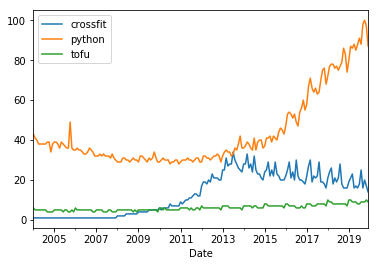

In [32]:
df[['crossfit', 'python', 'tofu']].plot();

#### 21. Zmodyfikuj swój wykres, tak by wizualnie jak najbardziej przypominał ten z Google Trends (link na górze notebooka) :)

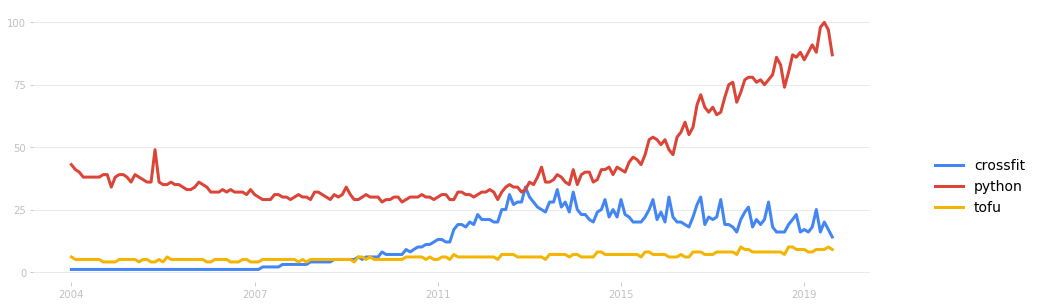

In [33]:
fig, ax = plt.subplots(figsize=(15,5))

# kolory Google
ax.plot(df['crossfit'], color='#4285F4', linewidth=3)
ax.plot(df['python'], color='#DB4437', linewidth=3)
ax.plot(df['tofu'], color='#F4B400', linewidth=3)

# usuwanie ramki wykresu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# dodanie poziomych linii w tle
ax.grid(axis='y', alpha=0.2, color='grey')

# dostosowanie tick'ów na osi y
ax.set_yticks([0, 25, 50, 75, 100])

# dostosowanie tick'ów na osi x
ax.set_xticks(df.index[::46]) # frequency

# kolory opisów obu osi
ax.tick_params(axis='both', labelcolor='#C0C0C0', color='#C0C0C0')

# legenda
ax.legend(bbox_to_anchor=(1.2, 0.5), frameon=False, fontsize=14);

## Część praktyczna II (zadanie domowe)

Wykorzystamy dane z eksperymentu na myszach prowadzonego na Uniwerystecie UCLA przez studentów. https://mdcune.psych.ucla.edu/modules/bioinformatics/extras/QTL_Sample_data.xls/view

#### 1. Ściągnij i wczytaj dane 

In [34]:
df2 = pd.read_excel('QTL_Sample_data.xls')

#### 2. Sprawdź strukturę wczytanej tabeli i typy danych

In [35]:
df2.head()

,ID,Point,Strain,sex,sex#,age,bodywt,brainwt,MedUNshOB,Res1_sex,Res2_sex-age,Res3_sex-age-bw,Res4_sex-age-bw-brnw
0,169,0.3,B,F,2,189,29.4,495.8,31.976,11.49506,9.57071,9.09569,7.37700
1,171,0.3,B,F,2,51,19.7,474.9,24.772,4.29106,4.92325,4.77891,2.92035
2,232,0.3,B,M,1,294,35.0,476.1,24.836,4.44382,0.57692,0.30106,-0.74414
3,1709,0.3,B,M,1,70,26.0,478.5,22.957,2.56518,3.08886,2.65279,0.89738
4,247,0.4,D,M,1,203,26.7,397.2,20.035,-0.35698,-2.53805,-2.35912,-1.33226


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 13 columns):
ID                      135 non-null int64
Point                   135 non-null float64
Strain                  135 non-null object
sex                     135 non-null object
sex#                    135 non-null int64
age                     135 non-null int64
bodywt                  135 non-null float64
brainwt                 135 non-null float64
MedUNshOB               135 non-null float64
Res1_sex                135 non-null float64
Res2_sex-age            135 non-null float64
Res3_sex-age-bw         135 non-null float64
Res4_sex-age-bw-brnw    135 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 13.8+ KB


#### 3. Sprawdź jaki był średni wiek (age) myszy

In [37]:
df2['age'].mean()

87.36296296296297

#### 4. Sprawdź jaka była największa wartość brainwt

In [38]:
df2['brainwt'].max()

551.5

#### 5. Stwórz histogram wartości brainwt

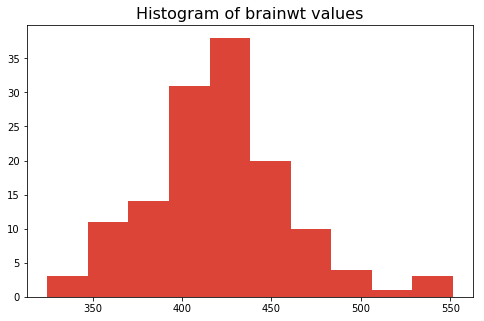

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df2['brainwt'], color='#DB4437')
ax.set_title('Histogram of brainwt values', fontsize=16)
ax.set_facecolor('white');

#### 6. Sprawdź jaka jest płeć (sex) myszy o ID 1709

In [40]:
df2[df2['ID'] == 1709]['sex']

3    M       
Name: sex, dtype: object

#### 7. Sprawdź jakie ID miała mysz o najwyższej wartości bodywt

In [41]:
df2[df2['bodywt'] == df2['bodywt'].max()]

,ID,Point,Strain,sex,sex#,age,bodywt,brainwt,MedUNshOB,Res1_sex,Res2_sex-age,Res3_sex-age-bw,Res4_sex-age-bw-brnw
2,232,0.3,B,M,1,294,35.0,476.1,24.836,4.44382,0.57692,0.30106,-0.74414


In [42]:
df2[df2['bodywt'] == df2['bodywt'].max()]['ID']

2    232
Name: ID, dtype: int64

#### 8. Sprawdź ile było myszy płci męskiej i żeńskiej

In [43]:
# dlaczego mamy podwójne wartości M i F?
df2['sex'].value_counts()

M           40
F           37
M           31
F           27
Name: sex, dtype: int64

In [44]:
# value_counts zwraca nam pandas Series, więc możemy podejrzeć,
# jakie wartości znajdują się w jej tymczasowym indeksie, który tworzą nasze F i M
# jak widać, różnice są spowodowane przez spacje, które musimy usunąć, by móc pogrupować dane
df2['sex'].value_counts().index

Index(['M', 'F', 'M       ', 'F       '], dtype='object')

In [45]:
# strip usuwa spacje wokół stringa
df2['sex'] = df2['sex'].str.strip()

In [46]:
df2['sex'].value_counts()

M    71
F    64
Name: sex, dtype: int64

In [47]:
# sprawdź, czy liczbowo jest to zgodne z drugą kolumną sex#
df2['sex#'].value_counts()

1    71
2    64
Name: sex#, dtype: int64

#### 9. Sprawdź ile było rodzajów linii myszy (Strain) w badaniu

In [48]:
df2['Strain'].nunique()

38

In [49]:
df2.head()

,ID,Point,Strain,sex,sex#,age,bodywt,brainwt,MedUNshOB,Res1_sex,Res2_sex-age,Res3_sex-age-bw,Res4_sex-age-bw-brnw
0,169,0.3,B,F,2,189,29.4,495.8,31.976,11.49506,9.57071,9.09569,7.37700
1,171,0.3,B,F,2,51,19.7,474.9,24.772,4.29106,4.92325,4.77891,2.92035
2,232,0.3,B,M,1,294,35.0,476.1,24.836,4.44382,0.57692,0.30106,-0.74414
3,1709,0.3,B,M,1,70,26.0,478.5,22.957,2.56518,3.08886,2.65279,0.89738
4,247,0.4,D,M,1,203,26.7,397.2,20.035,-0.35698,-2.53805,-2.35912,-1.33226


#### 10. Sprawdź jaka jest średnia wartość brainwt i bodywt odpowiednio dla myszy płci żeńskiej i męskiej

In [50]:
df2_mean = df2[['sex', 'bodywt', 'brainwt']].groupby('sex').mean()

In [51]:
df2_mean

,bodywt,brainwt
sex,,
F,20.357187,422.742188
M,22.194225,420.369014


#### 11. Narysuj barplot (wykres słupkowy dla średnich bodywt i brainwt dla obu płci z pytania 10.)

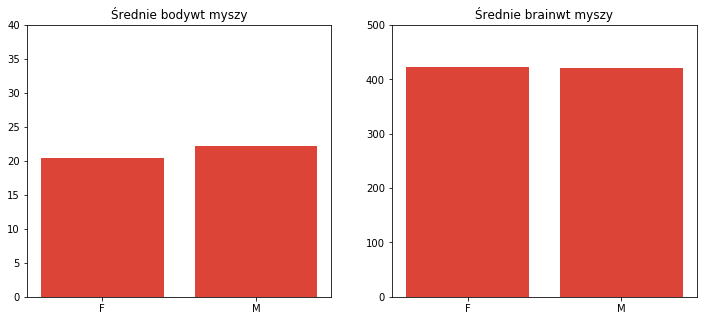

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].bar(x=df2_mean.index, height=df2_mean['bodywt'], color='#DB4437')
axes[0].set_title('Średnie bodywt myszy')
axes[0].set_ylim(0,40)

axes[1].bar(x=df2_mean.index, height=df2_mean['brainwt'], color='#DB4437', )
axes[1].set_title('Średnie brainwt myszy')
axes[1].set_ylim(0,500);

#### 12. Jaka jest mediana bodywt myszy?

In [53]:
df2['bodywt'].median()

21.24

#### 13. Ile myszy waży poniżej mediany bodywt?

In [54]:
len(df2[df2['bodywt'] < df2['bodywt'].median()])

67